In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
housing = pd.read_csv('housing.csv')
housing_na=housing.dropna(subset=["total_bedrooms"])
dummies=pd.get_dummies(housing_na.ocean_proximity)
dummies.head()
housing_na_dummies = pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()
housing_clean = housing_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [2]:

X=housing_clean.drop(['median_house_value'], axis='columns')
X.head()
y=housing_clean['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.2, 
                                                    random_state=1984)
from sklearn.linear_model import LinearRegression 
OLS = LinearRegression()
OLS.fit(X_train, y_train)
#display the intercept and coefficient
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, y_train)))

 the intercept is -2146719.495872414
 the coeffiients are [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
 the R_sqaured value is 0.6433902949192566


In [3]:
#predicting with OLS
y_pred=OLS.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':y_test})
performance.head()
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


In [4]:
#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


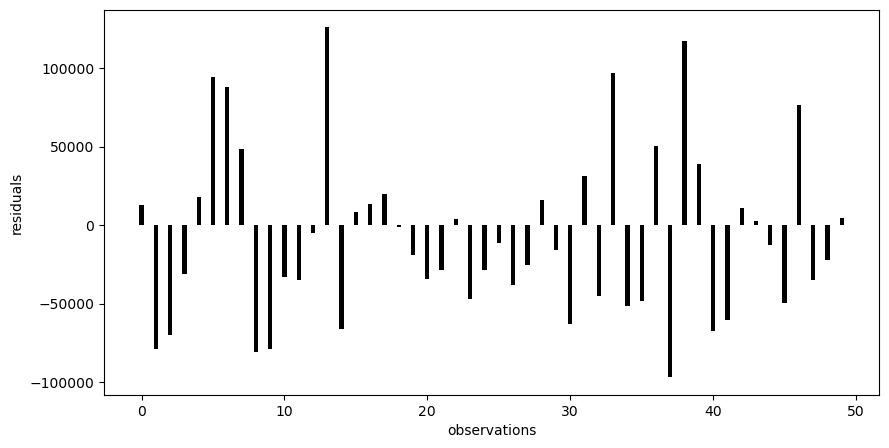

In [5]:
#plot the residuals
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()

In [6]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
6885,1.0,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,1,0,0,0
4220,1.0,-118.28,34.12,50.0,2384.0,312.0,836.0,337.0,12.8763,1,0,0,0
9915,1.0,-122.31,38.33,21.0,1922.0,344.0,1051.0,342.0,3.6042,0,0,1,0
294,1.0,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,0,0,1,0
6574,1.0,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,1,0,0,0


In [7]:
nicer_OLS=sm.OLS(y_train,X_train).fit()
nicer_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2456.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:00:52   Log-Likelihood:            -2.0522e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.147e+06   1.05e+05    -20.413      0.000   -2.35e+06   -1.94e+06
longitude          -2.722e+04   1141.708    -23.841      0.000   -2.95e+04    -2.5e+04
latitude           -2.612e+04   1125.571    -23.208      0.000   -2.83e+04   -2.39e+04
housing_median_age  1036.3175     49.179     21.072      0.000     939.922    1132.713
total_rooms           -6.3977      0.891     -7.184      0.000      -8.143      -4.652
total_bedrooms        99.7707      7.613     13.105      0.000      84.848     114.694
population           -37.3546      1.189    -31.405      0.000     -39.686     -35.023
households            49.9035      8.223      6.069      0.000      33.786      66.021
median_income       3.937e+04    382.254    102.983      0.000    3.86e+04    4.01e+04
<1H OCEAN           -1.49e+05   3.43e+04     -4.339      0.000   -2.16e+05   -8.17e+04
INLAND             -1.878e+05   3.44e+04     -5.456      0.000   -2.55e+05    -1.2e+05
NEAR BAY           -1.519e+05   3.44e+04     -4.416      0.000   -2.19e+05   -8.45e+04
NEAR OCEAN         -1.457e+05   3.44e+04     -4.239      0.000   -2.13e+05   -7.83e+04
==============================================================================
Omnibus:                     4103.497   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16258.145
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     8.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#creating a binary outcome variable: 
# if the house is more than 250K, then it is expensive, otherwise, not expensive
housing_clean['expensive'] = np.where(housing_clean['median_house_value']>250000,1,0)
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,expensive
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,1


In [11]:
#creating the features and labels dataset for logistic regression
X2=housing_clean.drop(columns=['median_house_value','expensive'])
y2=housing_clean['expensive']
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: expensive, dtype: int32

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=1984)

In [14]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [15]:
logistic.fit(X2_train,y2_train)

C:\Users\nxy114\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
accuracy=logistic.score(X2_test, y2_test)
accuracy = "{:.0%}".format(accuracy)

In [23]:
print(accuracy)



84%


In [24]:
nicerLogistic=sm.Logit (y2_train, X2_train).fit()

Optimization terminated successfully.
         Current function value: 0.314128
         Iterations 9


In [27]:
nicerLogistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              expensive   No. Observations:                16346
Model:                          Logit   Df Residuals:                    16334
Method:                           MLE   Df Model:                           11
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.4680
Time:                        08:16:56   Log-Likelihood:                -5134.7
converged:                       True   LL-Null:                       -9652.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude             -1.6638      0.078    -21.410      0.000      -1.816      -1.512
latitude              -1.6490      0.084    -19.672      0.000      -1.813      -1.485
housing_median_age     0.0375      0.002     16.034      0.000       0.033       0.042
total_rooms            0.0001   4.83e-05      2.834      0.005    4.22e-05       0.000
total_bedrooms         0.0008      0.000      1.827      0.068   -5.61e-05       0.002
population            -0.0021   9.25e-05    -22.635      0.000      -0.002      -0.002
households             0.0046      0.000      9.882      0.000       0.004       0.006
median_income          1.1000      0.026     41.825      0.000       1.048       1.152
<1H OCEAN           -147.4433      6.436    -22.908      0.000    -160.058    -134.828
INLAND              -147.8935      6.371    -23.214      0.000    -160.380    -135.407
NEAR BAY            -147.6586      6.438    -22.937      0.000    -160.276    -135.041
NEAR OCEAN          -147.4798      6.463    -22.818      0.000    -160.148    -134.812
======================================================================================
"""